In [72]:
import sys
import warnings
sys.path.append("/Users/arnavhiray/Fall 2023/CX 4242/DVA-Project/backend")
warnings.filterwarnings('ignore')

In [7]:


time_series = pd.DataFrame()
for i in range(100):
    sample_df = find_similar_scenarios(df, df.sample(1).iloc[0],  100)
    time_series[i] = sample_df["gower_similarity"].reset_index().drop("index", axis=1)
    #plt.plot(sample_df["gower_similarity"].reset_index().drop("index", axis=1).pct_change())


<Axes: >

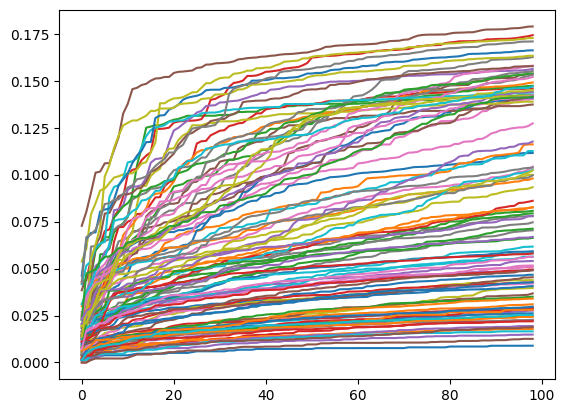

In [8]:
time_series.plot(legend=False)

In [93]:
import json 
import numpy as np
import matplotlib.pyplot as plt

f = open('optimal_n.json')
data = json.load(f)
 
same_means = []
different_means = []
n_values = [ i for i in range(10,101, 10)] + [ i for i in range(125,500, 25)]
for i in n_values:
    same, different = data[str(i)]
    same = np.array(same)
    different = np.array(different)
    same = same[~np.isnan(same)]
    different = different[~np.isnan(different)]
    same_means.append(np.mean(same)),
    different_means.append(np.mean(different))

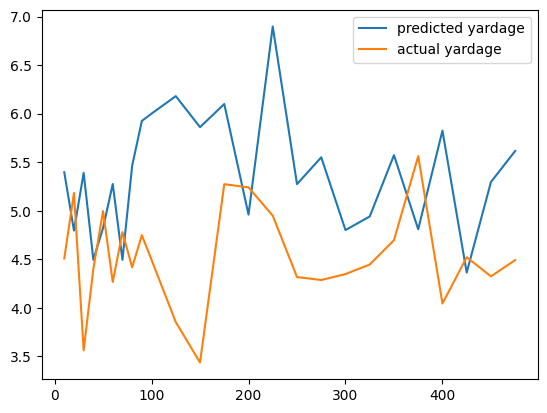

In [94]:
plt.plot(n_values, same_means, label="predicted yardage")
plt.plot(n_values, different_means, label="actual yardage ")
plt.legend()